In [5]:
#read data
lable = open("S71.dat")
next(lable)
taglist=[]
lablelist=[]
for line in lable:
    tag = line.split()[0]
    taglist.append(tag)
    lable = float(line.split()[1])
    if lable > 0.1:
        lable = 1
        lablelist.append(lable)
    if lable < 0.1:
        lable = 0
        lablelist.append(lable)
    
    
print(taglist,lablelist)

['A152S', 'A183T', 'A215P', 'A226P', 'A240V', 'A248P', 'A40P', 'A47W', 'A82V', 'D112R', 'D186H', 'D186W', 'D220E', 'E204K', 'E231M', 'E231R', 'G139N', 'G147T', 'G165A', 'G254V', 'G66A', 'H104F', 'I168R', 'I208V', 'K148W', 'K259F', 'K95A', 'L117F', 'M154F', 'N212R', 'N225V', 'N241L', 'N246W', 'N37P', 'P181A', 'P210K', 'P217L', 'Q119Y', 'Q133Y', 'Q182L', 'Q228V', 'Q91P', 'R100F', 'R123V', 'R280A', 'R90D', 'S125R', 'S136Q', 'S141P', 'S166T', 'S175W', 'S187P', 'S187W', 'S188Q', 'S193R', 'S238F', 'S54W', 'S92P', 'T113P', 'T116P', 'T140D', 'T151P', 'T198V', 'T266P', 'T279P', 'T286V', 'T51P', 'T77E', 'T77P', 'V134L', 'W159H'] [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]


In [14]:
import numpy as np
Y = np.array(lablelist)

In [15]:
import pandas as pd

df=pd.read_csv('fullS71.dat', sep=',')

In [16]:
X = df.values

In [17]:
X.shape

(71, 40)

In [18]:
Y.shape

(71,)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Using TensorFlow backend.
W0621 13:04:28.717125 4657499584 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 13:04:28.769804 4657499584 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 13:04:28.789184 4657499584 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0621 13:04:28.841790 4657499584 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0621 13:04:28.870990 4657499584 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 328       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 328       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 418
Trainable params: 418
Non-trainable params: 0
______________

In [22]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=200,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

W0621 13:04:37.921288 4657499584 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0621 13:04:37.967610 4657499584 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Model name: model_1


W0621 13:04:38.352468 4657499584 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0621 13:04:38.353541 4657499584 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Test loss: 0.9766165018081665
Test accuracy: 0.7333333492279053
Model name: model_2
Test loss: 1.887268304824829
Test accuracy: 0.6000000238418579
Model name: model_3
Test loss: 2.5966415405273438
Test accuracy: 0.46666666865348816


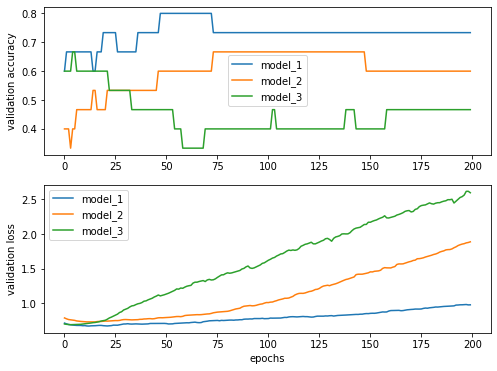

In [23]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

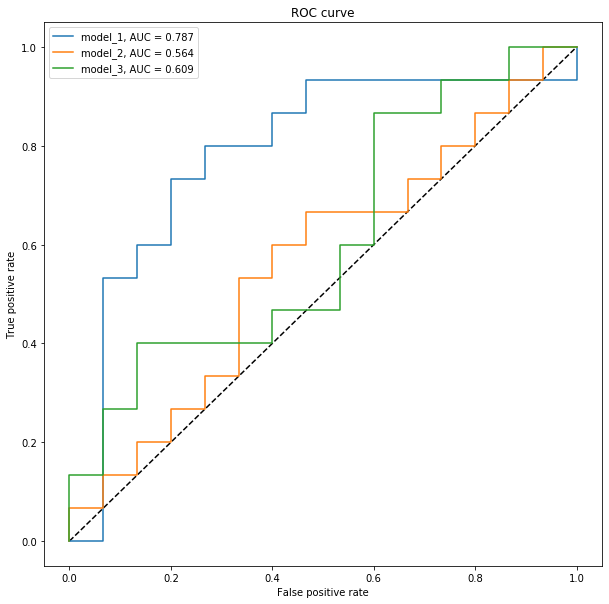

In [24]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [26]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=200, batch_size=5, verbose=0)
scores = cross_val_score(estimator, X_scaled, Y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

Accuracy : 0.58 (+/- 0.16)
